# Classifying Emails into Newsgroups:

## Data Description:

In this project, we have a collection of approximately 20,000 emails sent to 20 newsgroups. Our job is to classify them into correct newsgroups. Names of the newsgroups with their corresponding target values are:

    0 - alt.atheism,
    1 - comp.graphics,
    2 - comp.os.ms-windows.misc,
    3 - comp.sys.ibm.pc.hardware,
    4 - comp.sys.mac.hardware,
    5 - comp.windows.x,
    6 - misc.forsale,
    7 - rec.autos,
    8 - rec.motorcycles,
    9 - rec.sport.baseball,
    10 - rec.sport.hockey,
    11 - sci.crypt,
    12 - sci.electronics,
    13 - sci.med,
    14 - sci.space,
    15 - soc.religion.christian,
    16 - talk.politics.guns,
    17 - talk.politics.mideast,
    18 - talk.politics.misc,
    19 - talk.religion.misc

We obtained the data from  http://qwone.com/~jason/20Newsgroups/. It came in two folders: training and testing. In each folder there were 20 folders, each of which corresponding to a newsgroup, containing emails sent to that newsgroup.  In total, there were 18,846 emails. We formed a new dataset combining training and testing sets, did some exploration and preprocessing on this set, applied bag of words model, then finally split it into train and test datasets (Last 10 data points were held to show the performance of the models). 

We applied the following machine learning models and presented their results:

- Multinomial Naive Bayes
- Logistic Regression
- Support Vector Classification
- Stochastic Gradient Descent
- K Neighbors
- Neural Networks

## Loading the Data:

In [2]:
        #Load necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss

In [19]:
#Loading the data:
categories = [
    'alt.atheism',
    'comp.graphics',
    'comp.os.ms-windows.misc',
    'comp.sys.ibm.pc.hardware',
    'comp.sys.mac.hardware',
    'comp.windows.x',
    'misc.forsale',
    'rec.autos',
    'rec.motorcycles',
    'rec.sport.baseball',
    'rec.sport.hockey',
    'sci.crypt',
    'sci.electronics',
    'sci.med',
    'sci.space',
    'soc.religion.christian',
    'talk.politics.guns',
    'talk.politics.mideast',
    'talk.politics.misc',
    'talk.religion.misc'
]
#Extracting train data and saving it into "data" list
import os
data = []
for i in categories:
    file_numbers = os.listdir('20news-bydate-train/'+i)
    for j in range(len(file_numbers)):
        with open('20news-bydate-train/'+i+'/'+file_numbers[j]) as f:
            data.append((i, f.read()))

#Extracting test data and saving it into "data" list
for i in categories:
    file_numbers = os.listdir('20news-bydate-test/'+i)
    for j in range(len(file_numbers)):
        with open('20news-bydate-test/'+i+'/'+file_numbers[j]) as f:
            data.append((i, f.read()))
print(len(data))

18846


In [20]:

#Convert "data" list to DataFrame
data = pd.DataFrame(data, columns=['target', 'email'])
data.head()

,target,email
0,alt.atheism,From: mathew <mathew@mantis.co.uk>\nSubject: A...
1,alt.atheism,From: mathew <mathew@mantis.co.uk>\nSubject: A...
2,alt.atheism,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...
3,alt.atheism,From: mathew <mathew@mantis.co.uk>\nSubject: R...
4,alt.atheism,From: strom@Watson.Ibm.Com (Rob Strom)\nSubjec...


## Cleaning the Data:

In [21]:
#Take a look at the contents of an email
data['email'][2]

'From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Rosenau)\nSubject: Re: Gospel Dating\nOrganization: Technical University Braunschweig, Germany\nLines: 93\n\nIn article <65974@mimsy.umd.edu>\nmangoe@cs.umd.edu (Charley Wingate) writes:\n \n>>Well, John has a quite different, not necessarily more elaborated theology.\n>>There is some evidence that he must have known Luke, and that the content\n>>of Q was known to him, but not in a \'canonized\' form.\n>\n>This is a new argument to me.  Could you elaborate a little?\n>\n \nThe argument goes as follows: Q-oid quotes appear in John, but not in\nthe almost codified way they were in Matthew or Luke. However, they are\nconsidered to be similar enough to point to knowledge of Q as such, and\nnot an entirely different source.\n \n \n>>Assuming that he knew Luke would obviously put him after Luke, and would\n>>give evidence for the latter assumption.\n>\n>I don\'t think this follows.  If you take the most traditional attributions,\n>then Luke might 

To remove all html tags from the emails, we will use preprocessor function.

In [22]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text

data['email'] = data['email'].apply(preprocessor)
data['email'][2]

'from i3150101 dbstu1 rz tu bs de benedikt rosenau subject re gospel dating organization technical university braunschweig germany lines 93 in article mangoe cs umd edu charley wingate writes well john has a quite different not necessarily more elaborated theology there is some evidence that he must have known luke and that the content of q was known to him but not in a canonized form this is a new argument to me could you elaborate a little the argument goes as follows q oid quotes appear in john but not in the almost codified way they were in matthew or luke however they are considered to be similar enough to point to knowledge of q as such and not an entirely different source assuming that he knew luke would obviously put him after luke and would give evidence for the latter assumption i don t think this follows if you take the most traditional attributions then luke might have known john but john is an elder figure in either case we re talking spans of time here which are well with

In [23]:
#Convert categorical target values into numerical values from 0 to 19
class_le = LabelEncoder()
data['target'] = class_le.fit_transform(data['target'].values)
data.head()

,target,email
0,0,from mathew subject alt atheism faq atheist re...
1,0,from mathew subject alt atheism faq introducti...
2,0,from i3150101 dbstu1 rz tu bs de benedikt rose...
3,0,from mathew subject re university violating se...
4,0,from strom watson ibm com rob strom subject re...


In [24]:
#Randomize indices
data = data.reindex(np.random.permutation(data.index))

data.head()

,target,email
17623,16,from cdt sw stratus com c d tavares subject re...
1167,2,from wild access digex com wildstrom subject r...
143,0,from mangoe cs umd edu charley wingate subject...
2203,3,from wally auspex com wally bass subject re id...
17972,17,from hm cs brown edu harry mamaysky subject re...


## Exploratory Data Analysis:

### Are There Any Missing Data?

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18846 entries, 17623 to 18607
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  18846 non-null  int32 
 1   email   18846 non-null  object
dtypes: int32(1), object(1)
memory usage: 368.1+ KB


We do not have any missing data.

### Are There Any Duplicates in the Data?

In [26]:
data.groupby('target').describe()

email                                                               
       count unique                                                top freq
target                                                                     
0        799    799  from nyeda cnsvax uwec edu david nye subject c...    1
1        973    973  from powlesla acs ucalgary ca jim powlesland s...    1
2        985    985  from mveraart fel tno nl mario veraart subject...    1
3        982    982  from ebd fang att com elliot b dierksen subjec...    1
4        963    963  from noah apple com noah price subject re how ...    1
5        988    988  from robert swanee ee uwa edu au roberto togne...    1
6        975    973  from er1 eridan chuvashia su yarabayeva albina...    2
7        990    990  from colello cheshire oxy edu robert colello s...    1
8        996    996  organization washington university st louis fr...    1
9        994    994  from jkl cbnewsl cb att com jon k lyons subjec...    1
10       999    999  from shah pitt edu ravindra s shah subject re ...    1
11       991    991  from philip charon cto citicorp com philip gla...    1
12       984    984  from wb9omc dynamo ecn purdue edu duane p mant...    1
13       990    990  from brian quake sylmar ca us brian k yoder su...    1
14       987    987  from wats scicom alphacdc com bruce watson sub...    1
15       997    997  from eugene bigelow ebay sun com geno subject ...    1
16       910    910  from michaelh public btr com michael hahn mich...    1
17       940    940  from sera zuma uucp serdar argic subject re th...    1
18       775    775  from mst4298 rigel tamu edu mitchell s todd su...    1
19       628    628  from dickeney access digex com dick eney subje...    1

We see that in group 6 we have duplicates, let's drop them from the dataset.

In [27]:
data.drop_duplicates(inplace=True)
data.groupby('target').describe()

email                                                               
       count unique                                                top freq
target                                                                     
0        799    799  from nyeda cnsvax uwec edu david nye subject c...    1
1        973    973  from powlesla acs ucalgary ca jim powlesland s...    1
2        985    985  from mveraart fel tno nl mario veraart subject...    1
3        982    982  from ebd fang att com elliot b dierksen subjec...    1
4        963    963  from noah apple com noah price subject re how ...    1
5        988    988  from robert swanee ee uwa edu au roberto togne...    1
6        973    973  from dietrijj mentor cc purdue edu dietrijj su...    1
7        990    990  from colello cheshire oxy edu robert colello s...    1
8        996    996  organization washington university st louis fr...    1
9        994    994  from jkl cbnewsl cb att com jon k lyons subjec...    1
10       999    999  from shah pitt edu ravindra s shah subject re ...    1
11       991    991  from philip charon cto citicorp com philip gla...    1
12       984    984  from wb9omc dynamo ecn purdue edu duane p mant...    1
13       990    990  from brian quake sylmar ca us brian k yoder su...    1
14       987    987  from wats scicom alphacdc com bruce watson sub...    1
15       997    997  from eugene bigelow ebay sun com geno subject ...    1
16       910    910  from michaelh public btr com michael hahn mich...    1
17       940    940  from sera zuma uucp serdar argic subject re th...    1
18       775    775  from mst4298 rigel tamu edu mitchell s todd su...    1
19       628    628  from dickeney access digex com dick eney subje...    1

### How Long are the Emails:

In [28]:
data['length'] = data['email'].map(lambda text: len(text))
data.head()
data['length'].min()

107

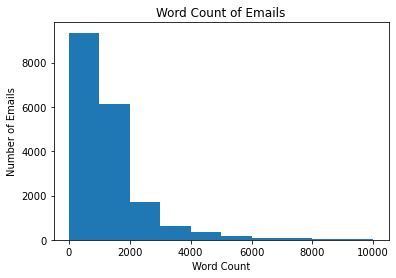

<Figure size 432x288 with 0 Axes>

In [29]:
plt.hist(data['length'], bins = [0,1000, 2000,3000,4000,5000,6000,7000,8000,9000,10000])
plt.title("Word Count of Emails") 
plt.xlabel('Word Count')
plt.ylabel('Number of Emails')
plt.show()
plt.savefig('Word_count.png')

In [30]:
data.length.describe()

count    18844.000000
mean      1633.540437
std       3082.500584
min        107.000000
25%        646.750000
50%       1006.000000
75%       1640.000000
max      67560.000000
Name: length, dtype: float64

We observe that the most frequent word count is 1000 or fewer. Very few of the emails contain more than 4000 words. On average, there are 1634 words in emails, and somebody took the time to write an email containing 67560 words!

### Is There Any Difference in Email Length Between Newsgroups?

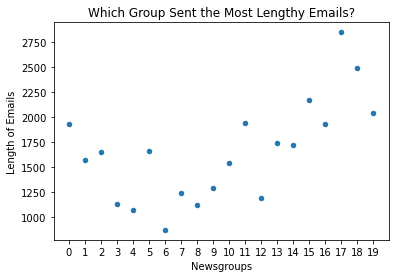

<Figure size 432x288 with 0 Axes>

In [87]:
length_per_newsgroup = pd.DataFrame(data.groupby('target')['length'].mean(), columns=[ 'length'])
l_per_news = length_per_newsgroup.reset_index()
l_per_news.plot(x='target', y='length',kind='scatter')
ticks=list(l_per_news['target'])
plt.xticks(ticks)
plt.xlabel('Newsgroups')
plt.ylabel('Length of Emails')
plt.title('Which Group Sent the Most Lengthy Emails?')
plt.show()
plt.savefig("Lengthy.png")

On average, Group 17, which corresponds to 'talk.politics.mideast' sent the most lengthy emails. 'talk.politics.misc' and 'talk.religion.misc' are the second and third runner-ups respectively. This is not surprising, as the politics and religion are the two topics people are generally very passionate to talk about.

## Applying Bag of Words:

We need to convert each email into a vector containing numbers to make them suitable for machine learning algorithm. We used bag of words approach, where each unique word in a text is represented by one number. 

In [32]:
#Load necessary libraries:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download('punkt')
import nltk
nltk.download('averaged_perceptron_tagger')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\h\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\h\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\h\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\h\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

We will tokenize words in text, remove stop words (commonly used English words that do not contribute in decision making) and normalize words into their base forms (lemmas) with the following code: 

In [33]:
stop = stopwords.words('english')
stop = stop + [u'a',u'b',u'c',u'd',u'e',u'f',u'g',u'h',u'i',u'j',u'k',u'l',u'm',u'n',u'o',u'p',u'q',u'r',u's',u't',u'v',u'w',u'x',u'y',u'z']

def tokenize_lemmas(email):
    email = str(email).lower()
    words = TextBlob(email).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words if word not in stop]

Now, we will convert each document into a vector that machine learning models can understand. In vectorization process, first we count how many times a word occurs in each document, then weight the counts, so that frequent tokens get lower weight. Finally, normalize the vectors to unit length. Each vector has as many dimensions as there are unique words in the document:

In [34]:
%%time
bow_transformer = CountVectorizer(analyzer=tokenize_lemmas).fit(data['email'])

print(len(bow_transformer.vocabulary_))

130656
Wall time: 1min 27s


In [35]:
%%time
data_bow = bow_transformer.transform(data['email'])
print('sparse matrix shape:', data_bow.shape)
print('number of non-zeros:', data_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * data_bow.nnz / (data_bow.shape[0] * data_bow.shape[1])))

sparse matrix shape: (18844, 130656)
number of non-zeros: 2188592
sparsity: 0.09%
Wall time: 1min 20s


Now that the data is ready, we can split it into training and testing sets. First 12,000 documents will be in the training set. 6,834 of the remaining 6,844, will be in the testing set and the last 10 will be held to test our models to see how they will perform:

## Splitting the Data into Training, Testing and Trial:

In [36]:
train_X = data_bow[:12000]
test_X = data_bow[12000:18834]
train_y = data['target'][:12000]
test_y = data['target'][12000:18834]
#The following will be never seen by the models. We will predict the results using our models
trial = data_bow[18834:]
sentiment = data['target'][18834:]
print('Train features shape:', train_X.shape)
print('Train target shape:', train_y.shape)
print('Test features shape:', test_X.shape)
print('Test target shape:', test_y.shape)
print('Trial features shape:', trial.shape)
print('Trial target shape:', sentiment.shape)


Train features shape: (12000, 130656)
Train target shape: (12000,)
Test features shape: (6834, 130656)
Test target shape: (6834,)
Trial features shape: (10, 130656)
Trial target shape: (10,)


## Classification Algorithms:

The following function will display accuracy for training and testing, classification report and confusion matrix after a model is applied. 

In [37]:
def acc_conf_mat(train, test, pred_train,pred_test):
    train_score = accuracy_score(train, pred_train) * 100
    print(f"Train accuracy score: {train_score:.2f}%")
    test_score = accuracy_score(test, pred_test) * 100
    print(f"Test accuracy score: {test_score:.2f}%")
    print(classification_report(test, pred_test))
    conf_matrix = confusion_matrix(test, pred_test)
    conf_display = ConfusionMatrixDisplay(conf_matrix)
    fig, ax = plt.subplots(figsize=(10,10))
    conf_display.plot(ax=ax)

### Applying Multinomial Naive Bayes Algorithm:

In [107]:
#import Multinomial Naive Bayes Classification
from sklearn.naive_bayes import MultinomialNB
mnb= MultinomialNB(alpha=0.01).fit(train_X, train_y)

Train accuracy score: 98.63%
Test accuracy score: 88.43%
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       289
           1       0.73      0.84      0.78       360
           2       0.97      0.39      0.55       360
           3       0.67      0.84      0.75       360
           4       0.82      0.88      0.85       376
           5       0.85      0.87      0.86       344
           6       0.77      0.87      0.82       331
           7       0.90      0.90      0.90       354
           8       0.94      0.96      0.95       370
           9       0.97      0.95      0.96       387
          10       0.98      0.96      0.97       358
          11       0.96      0.95      0.95       348
          12       0.84      0.86      0.85       357
          13       0.96      0.94      0.95       359
          14       0.93      0.94      0.94       362
          15       0.96      0.96      0.96       357
          16       0.93 

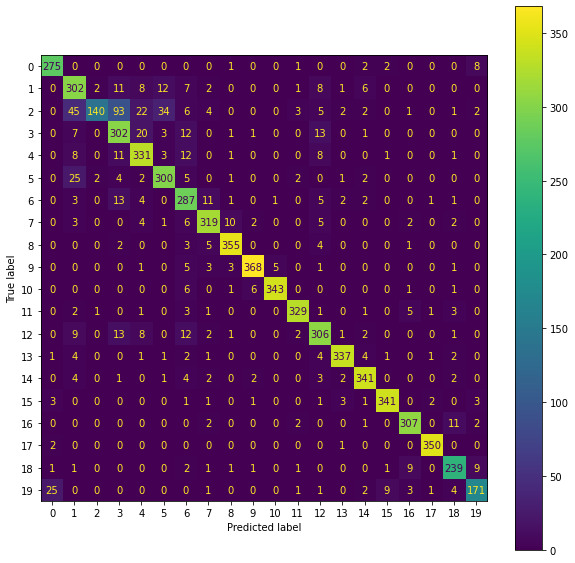

In [108]:
pred_train = mnb.predict(train_X)
pred_test = mnb.predict(test_X)
acc_conf_mat(train_y, test_y, pred_train, pred_test)

In [109]:
from sklearn.metrics import f1_score
f1 = f1_score(pred_test, test_y.values, average='macro')
print("f1 score for Multinomial Naive Bayes is {:.2f}".format(f1))

f1 score for Multinomial Naive Bayes is 0.88


In [110]:
y_pred = mnb.predict_proba(train_X)
print("Loss is {:.2f}".format(log_loss(pd.get_dummies(train_y), y_pred)))


Loss is 0.21


In [111]:
from math import log
print("Baseline for a 20 class classification is {:.2f}".format(-log(1/20)))

Baseline for a 20 class classification is 3.00


In [112]:
pred = mnb.predict(trial)
print("Actual values for the unseen data are:     ", list(sentiment))
print("Predicted values for the unseen data are: ", pred)

Actual values for the unseen data are:      [17, 7, 8, 2, 4, 18, 5, 0, 19, 19]
Predicted values for the unseen data are:  [17  7  8  1  4 18  5 19 19 19]


### Applying Logistic Regression:

In [113]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_X, train_y)
train_pred = lr.predict(train_X)
test_pred = lr.predict(test_X)

C:\Users\h\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [114]:
from sklearn.metrics import f1_score
f1 = f1_score(test_pred, test_y.values, average='macro')
print("f1 score for Logistic Regression is {:.2f}".format(f1))

f1 score for Logistic Regression is 0.89


Train accuracy score: 100.00%
Test accuracy score: 88.84%
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       289
           1       0.79      0.84      0.81       360
           2       0.82      0.82      0.82       360
           3       0.77      0.78      0.77       360
           4       0.88      0.86      0.87       376
           5       0.88      0.89      0.88       344
           6       0.78      0.88      0.83       331
           7       0.89      0.89      0.89       354
           8       0.96      0.94      0.95       370
           9       0.94      0.96      0.95       387
          10       0.96      0.95      0.95       358
          11       0.97      0.94      0.95       348
          12       0.87      0.81      0.84       357
          13       0.91      0.92      0.92       359
          14       0.94      0.93      0.93       362
          15       0.90      0.94      0.92       357
          16       0.92

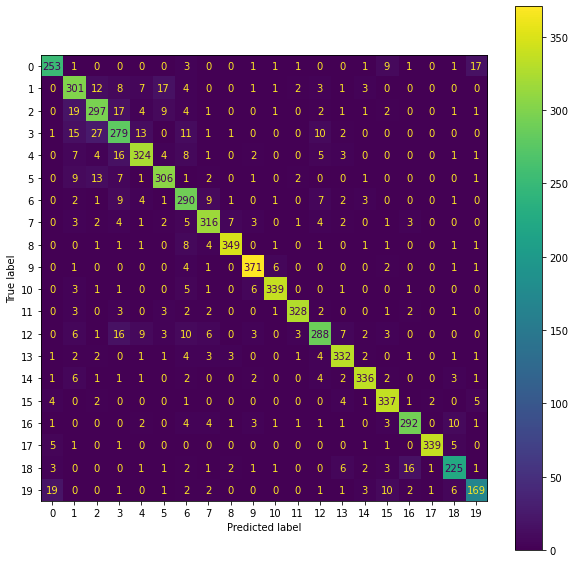

In [115]:
acc_conf_mat(train_y, test_y, train_pred, test_pred)

In [116]:
from sklearn.metrics import log_loss
y_pred = lr.predict_proba(train_X)
print("Loss is {:.2f}".format(log_loss(train_y, y_pred)))

Loss is 0.02


In [117]:
pred =lr.predict(trial)
print("Actual values for the unseen data are:     ", list(sentiment))
print("Predicted values for the unseen data are: ", pred)

Actual values for the unseen data are:      [17, 7, 8, 2, 4, 18, 5, 0, 19, 19]
Predicted values for the unseen data are:  [17  7  8  2  4 18  5 19 19 16]


### Applying Support Vector Classification:

Train accuracy score: 99.76%
Test accuracy score: 86.13%
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       289
           1       0.73      0.82      0.77       360
           2       0.78      0.79      0.79       360
           3       0.73      0.74      0.74       360
           4       0.85      0.85      0.85       376
           5       0.84      0.85      0.84       344
           6       0.78      0.89      0.83       331
           7       0.84      0.85      0.85       354
           8       0.94      0.91      0.93       370
           9       0.91      0.92      0.91       387
          10       0.98      0.94      0.96       358
          11       0.94      0.91      0.93       348
          12       0.81      0.77      0.79       357
          13       0.86      0.88      0.87       359
          14       0.94      0.90      0.92       362
          15       0.89      0.92      0.91       357
          16       0.90 

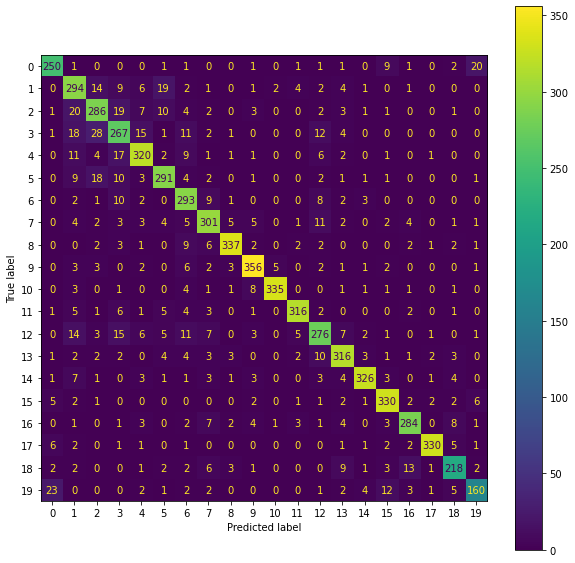

In [118]:
from sklearn.svm import SVC


svm = SVC(kernel='linear', C=0.025,random_state=101,probability=True)
svm.fit(train_X, train_y)
train_pred = svm.predict(train_X)
test_pred = svm.predict(test_X)
acc_conf_mat(train_y, test_y, train_pred, test_pred)

In [119]:
f1 = f1_score(test_pred, test_y.values, average='macro')
print("f1 score for Support Vector Classification is {:.2f}".format(f1))

f1 score for Support Vector Classification is 0.86


In [120]:
y_pred = svm.predict_proba(train_X)
print("Loss is {:.2f}".format(log_loss(pd.get_dummies(train_y),y_pred)))


Loss is 0.08


In [121]:
pred = svm.predict(trial)
print("Actual values for the unseen data are:      ", list(sentiment))
print("Predicted values for the unseen data are: ", pred)

Actual values for the unseen data are:       [17, 7, 8, 2, 4, 18, 5, 0, 19, 19]
Predicted values for the unseen data are:  [17  7  8  2  4 18  5 15 19 16]


### Applying K-Neighbors:

Train accuracy score: 100.00%
Test accuracy score: 61.56%
              precision    recall  f1-score   support

           0       0.20      0.71      0.32       289
           1       0.51      0.44      0.47       360
           2       0.67      0.59      0.63       360
           3       0.75      0.47      0.58       360
           4       0.67      0.47      0.55       376
           5       0.76      0.53      0.63       344
           6       0.51      0.50      0.51       331
           7       0.65      0.56      0.60       354
           8       0.85      0.69      0.76       370
           9       0.70      0.68      0.69       387
          10       0.68      0.70      0.69       358
          11       0.93      0.71      0.80       348
          12       0.73      0.50      0.59       357
          13       0.66      0.61      0.63       359
          14       0.90      0.69      0.78       362
          15       0.50      0.71      0.58       357
          16       0.84

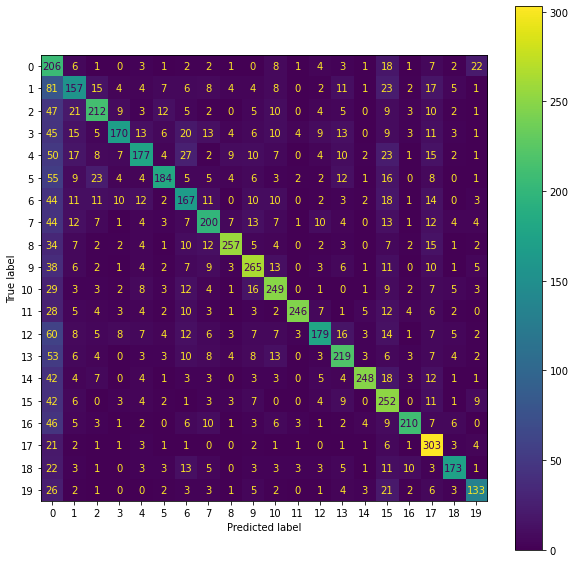

In [132]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn.fit(train_X, train_y)
train_pred = knn.predict(train_X)
test_pred = knn.predict(test_X)
acc_conf_mat(train_y, test_y, train_pred, test_pred)

In [133]:
f1 = f1_score(test_pred, test_y.values, average='macro')
print("f1 score for K neighbors is {:.2f}".format(f1))

f1 score for K neighbors is 0.63


In [134]:
pred = knn.predict(trial)
print("Actual values for the unseen data are:     ", list(sentiment))
print("Predicted values for the unseen data are: ", pred)

Actual values for the unseen data are:      [17, 7, 8, 2, 4, 18, 5, 0, 19, 19]
Predicted values for the unseen data are:  [17  7  8 13  4 18  5  4  0 17]


### Applying Neural Networks:

In [135]:
train_y_dummied = pd.get_dummies(train_y).to_numpy()
test_y_dummied = pd.get_dummies(test_y).to_numpy()

In [136]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD

# Stochastic Logistic Regression
model_cat = Sequential()

# validation loss 
model_cat.add(Dense(units=300, input_shape=[130656],activation='relu', kernel_regularizer=l2(0.001)))
model_cat.add(Dense(units=200,activation='relu', kernel_regularizer=l2(0.0001)))
model_cat.add(Dense(units=20, activation='softmax', kernel_regularizer=l2(0.0001)))

# Compile model
sgd = SGD(learning_rate=0.1)
model_cat.compile(loss='categorical_crossentropy', optimizer=sgd)


In [137]:
model_cat.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 300)               39197100  
                                                                 
 dense_4 (Dense)             (None, 200)               60200     
                                                                 
 dense_5 (Dense)             (None, 20)                4020      
                                                                 
Total params: 39,261,320
Trainable params: 39,261,320
Non-trainable params: 0
_________________________________________________________________


In [138]:
# Fit the model
history = model_cat.fit(train_X, train_y_dummied, batch_size = 256,
          epochs = 100, verbose=0, validation_data=(test_X,test_y_dummied))

C:\Users\h\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_1/dense_3/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_1/dense_3/embedding_lookup_sparse/Reshape:0", shape=(None, 300), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_1/dense_3/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Validation Loss after final iteration:  0.6763744354248047
Training Loss after final iteration:  0.18707136809825897


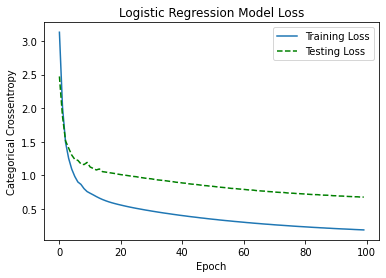

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Logistic Regression Model Loss')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print("Validation Loss after final iteration: ", history.history['val_loss'][-1])
print("Training Loss after final iteration: ", history.history['loss'][-1])

plt.show()

In [140]:
predictions_test = pd.DataFrame(model_cat.predict(test_X))
predictions_train = pd.DataFrame(model_cat.predict(train_X))

375/375 [==============================] - 3s 7ms/step


In [141]:
def assign_one(row):
    ind_max = row.argmax()
    for i in range(20):
        if i == ind_max:
            row[i]=1
        else:
            row[i]=0
    return row 
test = predictions_test.apply(assign_one, axis=1)
train = predictions_train.apply(assign_one, axis=1)

In [154]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
train_score = accuracy_score(train_y_dummied, train) * 100
print(f"Train accuracy score: {train_score:.2f}%")
test_score = accuracy_score(test_y_dummied, test) * 100
print(f"Test accuracy score: {test_score:.2f}%")
print(classification_report(test_y_dummied, test))

Train accuracy score: 99.99%
Test accuracy score: 88.56%
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       289
           1       0.80      0.83      0.82       360
           2       0.79      0.84      0.81       360
           3       0.76      0.76      0.76       360
           4       0.86      0.87      0.87       376
           5       0.87      0.88      0.88       344
           6       0.79      0.87      0.83       331
           7       0.88      0.88      0.88       354
           8       0.95      0.94      0.95       370
           9       0.94      0.95      0.94       387
          10       0.97      0.95      0.96       358
          11       0.96      0.93      0.94       348
          12       0.87      0.80      0.83       357
          13       0.94      0.92      0.93       359
          14       0.93      0.93      0.93       362
          15       0.89      0.94      0.92       357
          16       0.93 

In [144]:
f1 = f1_score(test_y_dummied, test, average='macro')
print("f1 score for Neural Networks is {:.2f}".format(f1))

f1 score for Neural Networks is 0.88


In [145]:
test_X_pred = model_cat.predict(test_X)
train_X_pred = model_cat.predict(train_X)

375/375 [==============================] - 2s 6ms/step


In [146]:
def assign_index(row):
    return row.argmax()
test_X_predictions = pd.DataFrame(test_X_pred).apply(assign_index, axis=1)
train_X_predictions = pd.DataFrame(train_X_pred).apply(assign_index, axis=1)
train_X_predictions_dummied = pd.get_dummies(train_X_predictions)
test_X_predictions_dummied = pd.get_dummies(test_X_predictions)


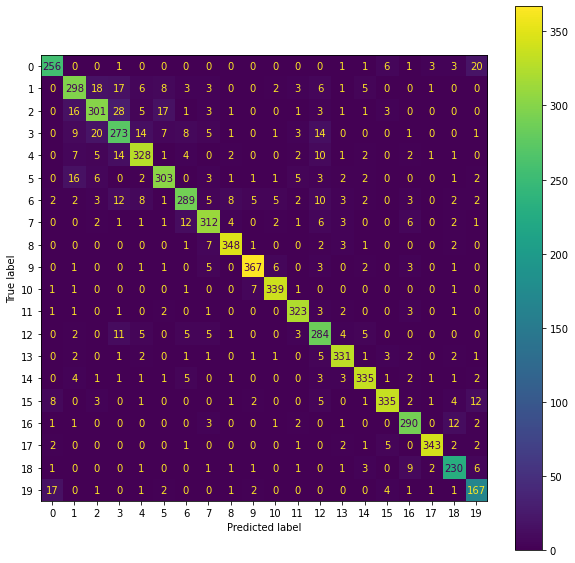

In [149]:
conf_m = confusion_matrix(test_X_predictions, test_y)
conf_mat_d = ConfusionMatrixDisplay(conf_m)
fig, ax = plt.subplots(figsize=(10,10))
conf_mat_d.plot(ax=ax)

In [150]:
pred = pd.DataFrame(model_cat.predict(trial)).apply(assign_index, axis=1)
print("Actual values for the unseen data are:     ", list(sentiment))
print("Predicted values for the unseen data are: ", pred.values)

1/1 [==============================] - 0s 7ms/step
Actual values for the unseen data are:      [17, 7, 8, 2, 4, 18, 5, 0, 19, 19]
Predicted values for the unseen data are:  [17  7  8  2  4 18  5 19 19 16]


## Conclusion:

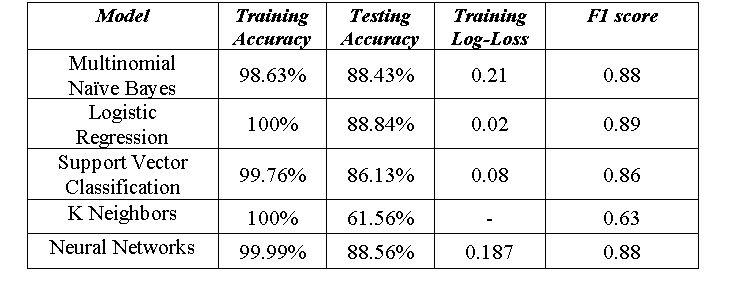

Apparently, Multinomial Naïve Bayes, Logistic Regression, and Neural Networks were the best performing algorithms with more than 88% testing accuracy. They are followed by Support Vector Classification. The worst performing was K-Neighbors. It's probably due to the curse of dimensionality. K-Neighbors performs best with fewer number of features. If the number of features is high, it requires more data. When there is more data, it is prone to overfitting, which is exactly what we see here with 100% training accuracy and only 62% testing accuracy. In our case we have 130,656 features, which is extremely large in size. Overall, Logistic Regression proves to be the best choice as it also provides higher f1 score on testing and lower loss on training sets.